In [ ]:
# Лабораторная работа по модулю “Построение моделей”

# 1.  Загрузить данные из папки Data Folder
# 2.  Провести описательный анализ предложенных данных
# 3.  Предложить стратегию по работе с категориальными переменными 
# 4.  Провести углубленный анализ данных (корреляции переменных, визуализация взаимосвязей)
# 5.  Следует ли увеличивать/уменьшать размерность признакового множества (какой подход выдает лучшие результаты)
# 6.  Следует ли балансировать классы путем oversampling/undersampling? (улучшает ли подход результаты)
# 7.  Сделать кросс-валидацию данных с использованием подхода K-fold (n_folds=3)
# 8.  Решить задачу мультиклассовой классификации и предсказать религию страны (religion) по деталям ее флага 
# 9.  Рассчитать Feature Importances для переменных модели
# 10. Проверить качество классификации с использованием следующих метрик: Accuracy, F1-Score, Precision, Recall
# 11. Построить Confusion Matrix для ваших результатов
# 12. Загрузить ipython notebook с результатами работы на github репозиторий

In [63]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [198]:
data = pd.read_csv('flag.data')
data.head(50) 

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,saltires,quarters,sunstars,crescent,triangle,icon,animate,text,topleft,botright
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,blue,red
5,Angola,4,2,1247,7,10,5,0,2,3,...,0,0,1,0,0,1,0,0,red,black
6,Anguilla,1,4,0,0,1,1,0,1,3,...,0,0,0,0,0,0,1,0,white,blue
7,Antigua-Barbuda,1,4,0,0,1,1,0,1,5,...,0,0,1,0,1,0,0,0,black,red
8,Argentina,2,3,2777,28,2,0,0,3,2,...,0,0,0,0,0,0,0,0,blue,blue
9,Argentine,2,3,2777,28,2,0,0,3,3,...,0,0,1,0,0,0,0,0,blue,blue


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 30 columns):
name          194 non-null object
landmass      194 non-null int64
zone          194 non-null int64
area          194 non-null int64
population    194 non-null int64
language      194 non-null int64
religion      194 non-null int64
bars          194 non-null int64
stripes       194 non-null int64
colours       194 non-null int64
red           194 non-null int64
green         194 non-null int64
blue          194 non-null int64
gold          194 non-null int64
white         194 non-null int64
black         194 non-null int64
orange        194 non-null int64
mainhue       194 non-null object
circles       194 non-null int64
crosses       194 non-null int64
saltires      194 non-null int64
quarters      194 non-null int64
sunstars      194 non-null int64
crescent      194 non-null int64
triangle      194 non-null int64
icon          194 non-null int64
animate       194 non-null int64
te

In [8]:
data.describe()

,landmass,zone,area,population,language,religion,bars,stripes,colours,red,...,circles,crosses,saltires,quarters,sunstars,crescent,triangle,icon,animate,text
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3.572165,2.211340,700.046392,23.268041,5.340206,2.190722,0.453608,1.551546,3.463918,0.788660,...,0.170103,0.149485,0.092784,0.149485,1.386598,0.056701,0.139175,0.252577,0.201031,0.082474
std,1.553018,1.308274,2170.927932,91.934085,3.496517,2.061167,1.038339,2.328005,1.300154,0.409315,...,0.463075,0.385387,0.290879,0.435860,4.396186,0.231869,0.347025,0.435615,0.401808,0.275798
min,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,1.000000,9.000000,0.000000,2.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,111.000000,4.000000,6.000000,1.000000,0.000000,0.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,4.000000,471.250000,14.000000,9.000000,4.000000,0.000000,3.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.750000,0.000000,0.000000
max,6.000000,4.000000,22402.000000,1008.000000,10.000000,7.000000,5.000000,14.000000,8.000000,1.000000,...,4.000000,2.000000,1.000000,4.000000,50.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# name          194 non-null object - название страны 
# landmass      194 non-null int64  - категориальная 
# zone          194 non-null int64  - категориальная 
# area          194 non-null int64  - количественная 
# population    194 non-null int64  - количественная
# language      194 non-null int64  - категориальная 
# religion      194 non-null int64  - целевая переменная
# bars          194 non-null int64  - количественная  
# stripes       194 non-null int64  - количественная
# colours       194 non-null int64  - количественная
# red           194 non-null int64  - бинарная
# green         194 non-null int64  - бинарная
# blue          194 non-null int64  - бинарная
# gold          194 non-null int64  - бинарная
# white         194 non-null int64  - бинарная
# black         194 non-null int64  - бинарная
# orange        194 non-null int64  - бинарная
# mainhue       194 non-null object - категориальная  
# circles       194 non-null int64  - количественная
# crosses       194 non-null int64  - количественная
# saltires      194 non-null int64  - количественная
# quarters      194 non-null int64  - количественная
# sunstars      194 non-null int64  - количественная
# crescent      194 non-null int64  - бинарная
# triangle      194 non-null int64  - бинарная
# icon          194 non-null int64  - бинарная
# animate       194 non-null int64  - бинарная
# text          194 non-null int64  - бинарная
# topleft       194 non-null object - категориальная  
# botright      194 non-null object - категориальная   

In [ ]:
# ['name ', 'landmass','zone','area','population','language','religion','bars','stripes','colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']

In [ ]:
# Посмотрим на категориальные переменнве

In [13]:
data['religion'].value_counts()

1    60
0    40
2    36
5    27
6    15
3     8
7     4
4     4
Name: religion, dtype: int64

In [ ]:
# Видно что присутствует сильный дибаланс классов

In [14]:
data['mainhue'].value_counts()

red       71
blue      40
green     31
white     22
gold      19
black      5
orange     4
brown      2
Name: mainhue, dtype: int64

In [15]:
data['topleft'].value_counts()

red       56
blue      43
white     41
green     32
black     12
gold       6
orange     4
Name: topleft, dtype: int64

In [16]:
data['botright'].value_counts()

red       69
blue      47
green     40
white     17
black      9
gold       9
brown      2
orange     1
Name: botright, dtype: int64

In [ ]:
# Переменные mainhue, topleft и  botright содержат цвета и при этом разный набор цветов, 
# по этому при кодировании этих переменных используем общий словарь цветов 
# в котором дополнительно будет цвет - неизвестный ()

In [ ]:
# другите (landmass, zone, language) категориальные переменные содержат в себе, так сказать, законченый набор вариантов

In [9]:
corr = data.corr()

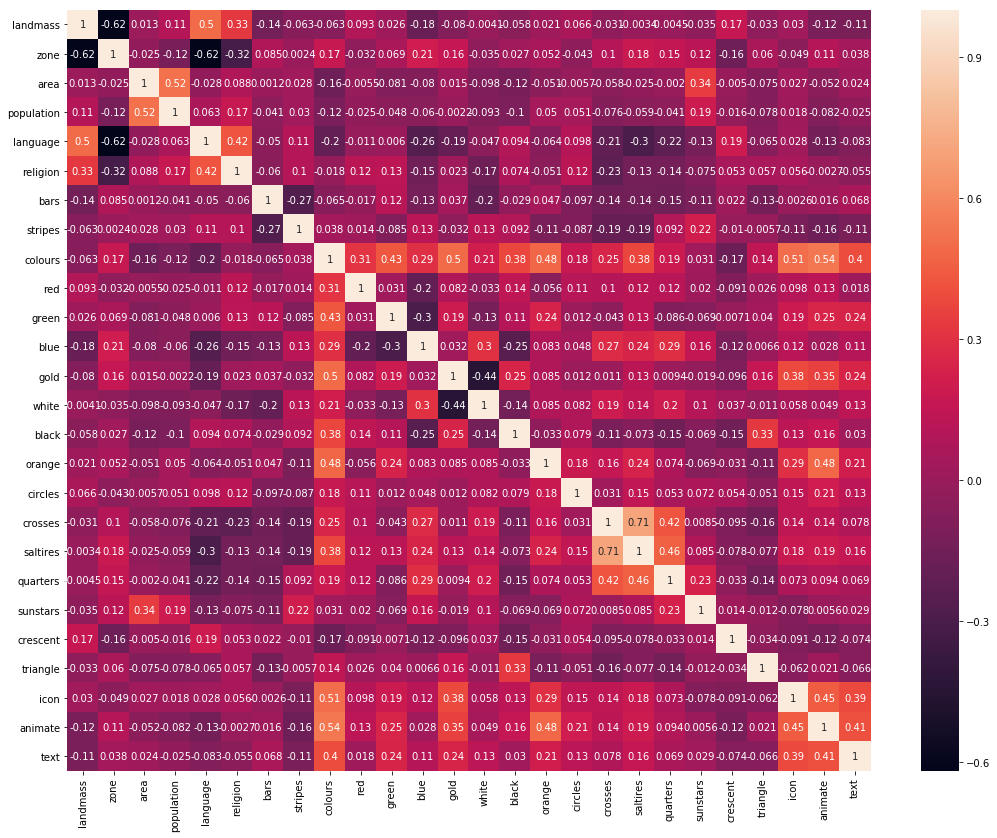

In [18]:
matplotlib.pyplot.figure(figsize=(18, 14))
sns.heatmap(corr, annot=True)

In [ ]:
# Из картинки видно что присутствуют зависимые переменные
# Для целевой переменной в основном  выделяются язык(language) и територия(landmass)

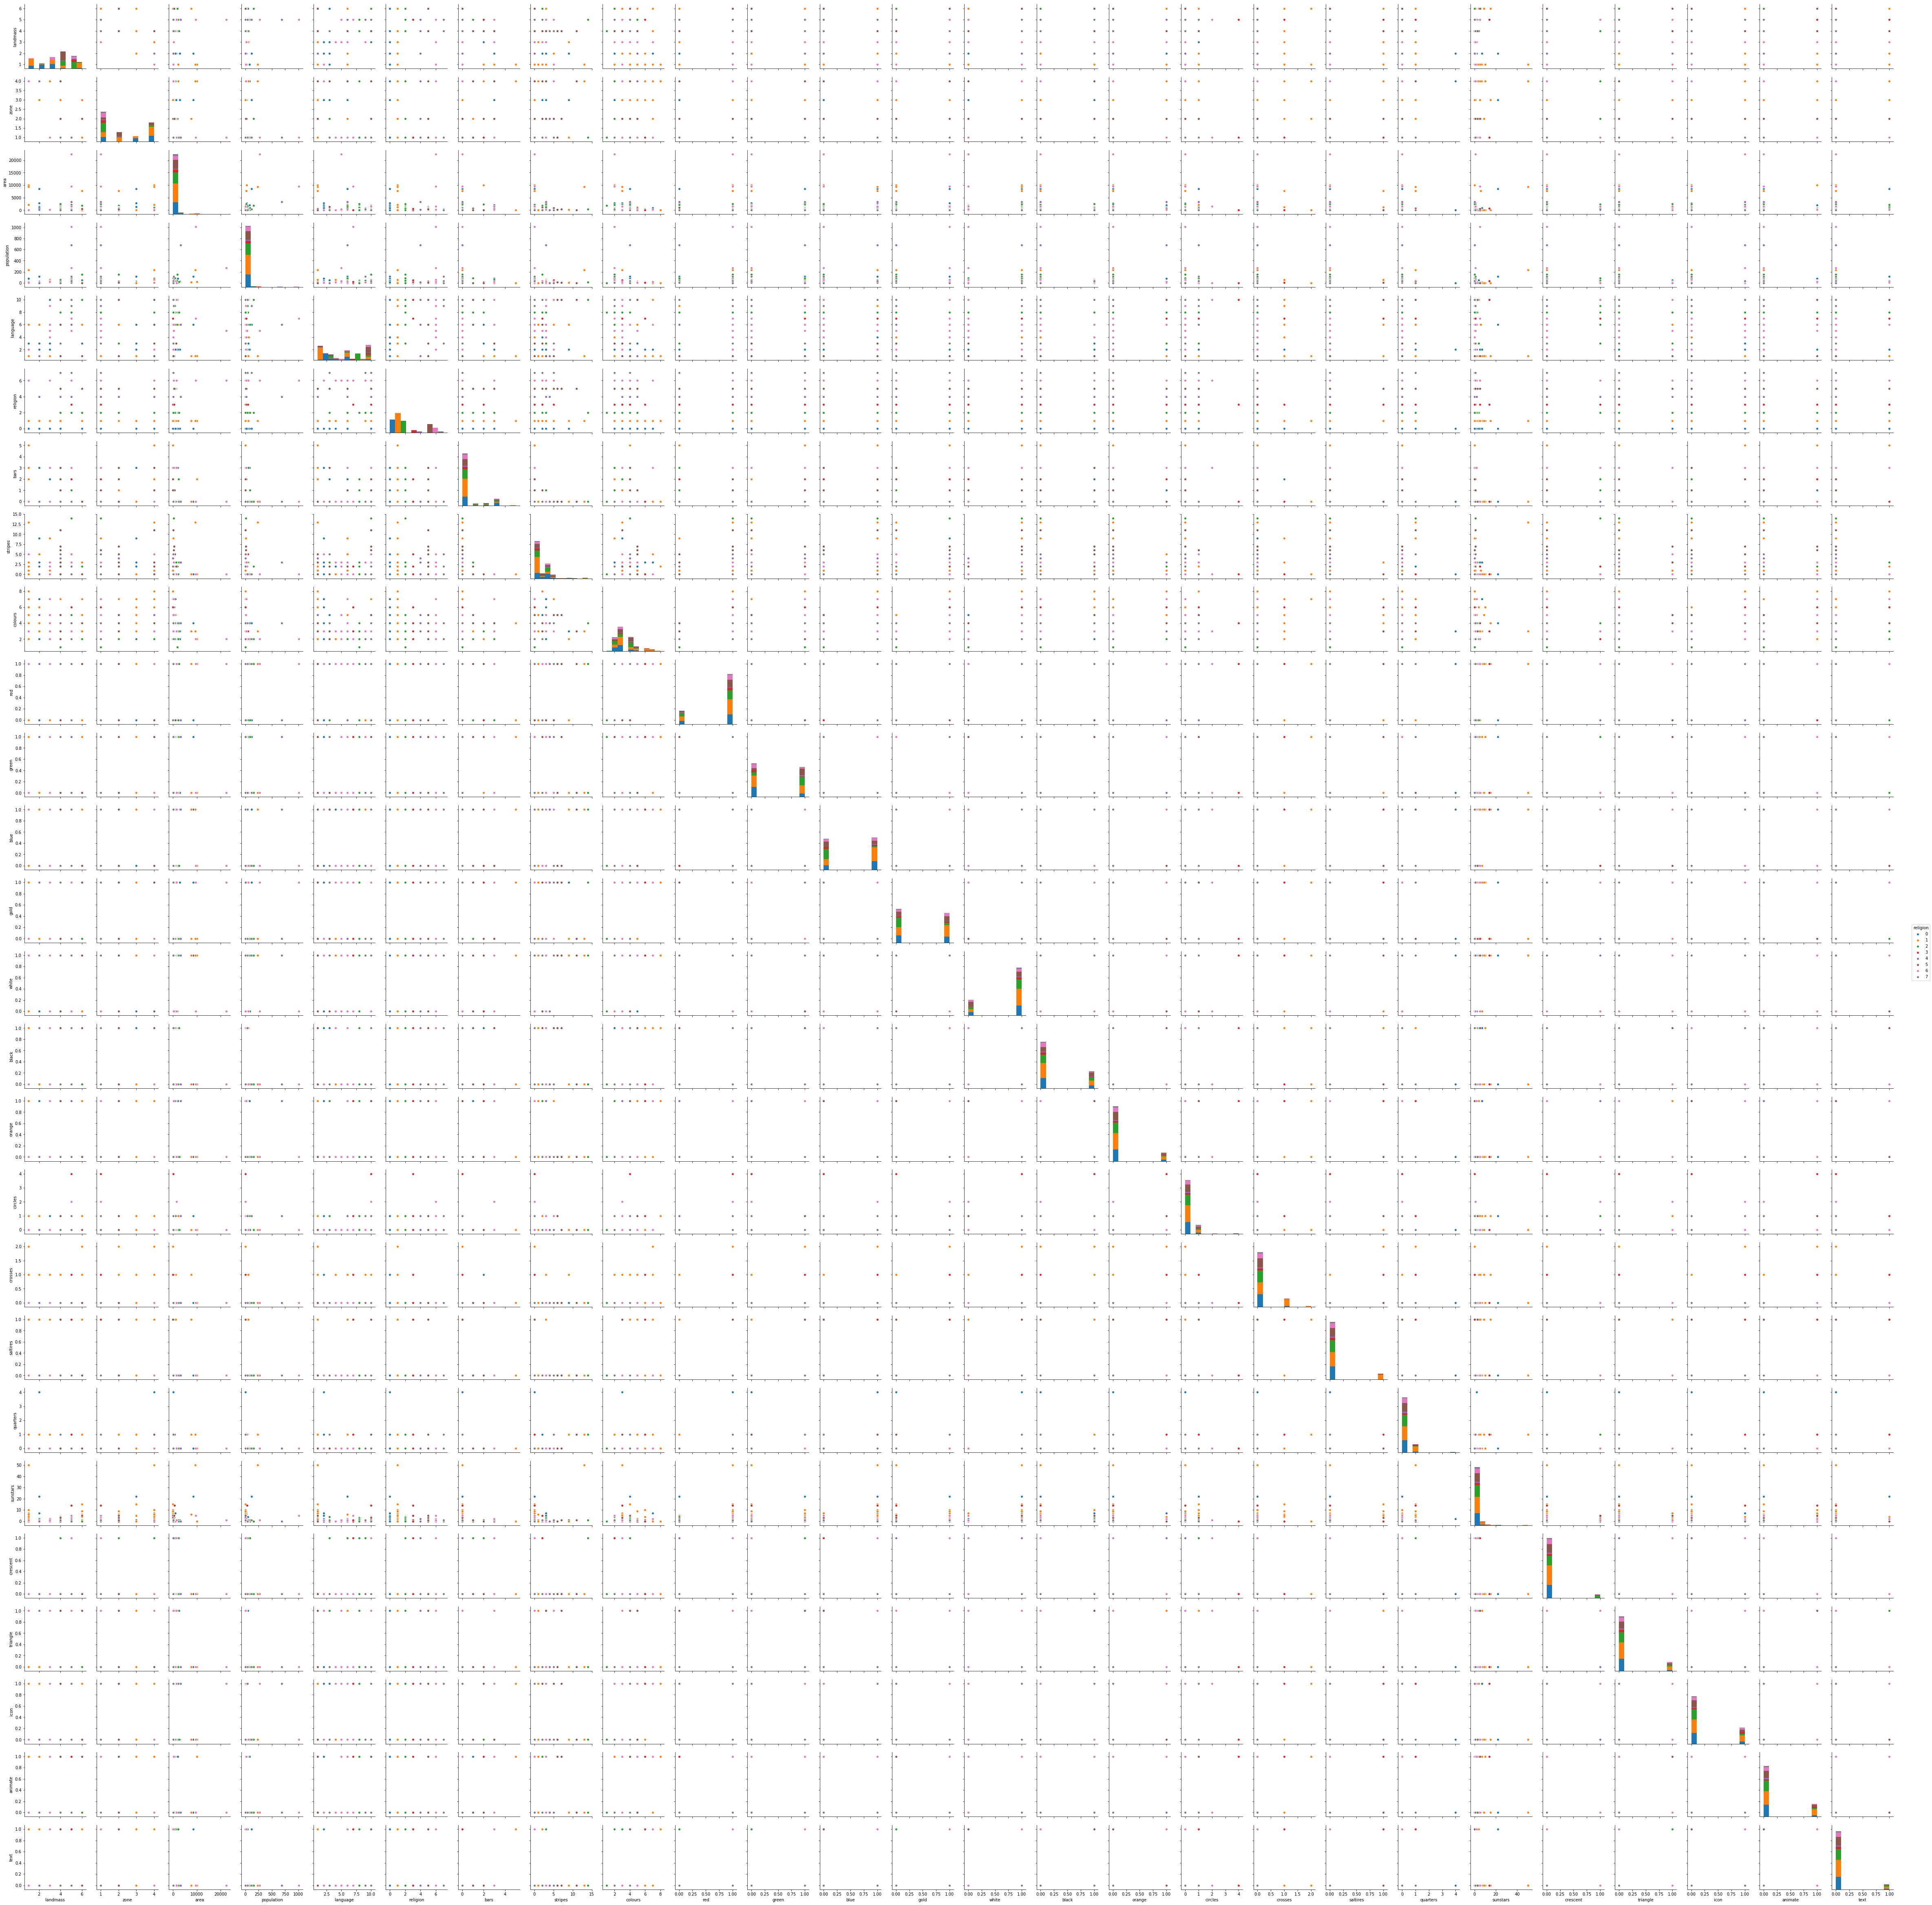

In [11]:
# получившуюся картинку можно хорошо рассмотреть если открыть ее в отдельном редакторе
sns.pairplot(data[['landmass','zone','area','population','language','religion','bars','stripes','colours','red','green','blue','gold','white','black','orange','mainhue','circles','crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']], \
            hue='religion')

In [199]:
# Функция кодирования one hot encoding  для переменных описывающих цвет
color_list = ['red', 'orange', 'brown', 'beige', 'gold', 'yellow', 'green', 'cyan', 'blue_green', 'blue', 'purple', 'pink', 'white', 'black' ] 

def OHE_colors_columns(data, columns):
    for column in columns:
        OHE_colors_column(data, column)
    return data.drop(columns=columns)   
        
def OHE_colors_column(data, column): 
    new_columns = [column+'_'+color for color in color_list]
    for color in color_list:
        data[column+'_'+color] = data[column].apply(lambda x: 1 if x == color else 0)
    data[column+'_other'] = data[new_columns].apply(lambda x: 1 if x.sum() == 0 else 0, axis=1)  
    


In [200]:
# подготовим данные
data = OHE_colors_columns(data, ['mainhue','topleft','botright'])

In [48]:
data.head()

,name,landmass,zone,area,population,language,religion,bars,stripes,colours,...,botright_yellow,botright_green,botright_cyan,botright_blue_green,botright_blue,botright_purple,botright_pink,botright_white,botright_black,botright_other
0,Afghanistan,5,1,648,16,10,2,0,3,5,...,0,1,0,0,0,0,0,0,0,0
1,Albania,3,1,29,3,6,6,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,Algeria,4,1,2388,20,8,2,2,0,3,...,0,0,0,0,0,0,0,1,0,0
3,American-Samoa,6,3,0,0,1,1,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,Andorra,3,1,0,0,6,0,3,0,3,...,0,0,0,0,0,0,0,0,0,0


In [201]:
dict_landmass = {1:'N_America', 2:'S_America', 3:'Europe', 4:'Africa', 5:'Asia', 6:'Oceania'}
dict_language = {1:'English', 2:'Spanish', 3:'French', 4:'German', 5:'Slavic', 6:'Other_Indo_European', 7:'Chinese', 
                 8:'Arabic', 9:'Japanese_Turkish_Finnish_Magyar', 10:'Others'}
dict_zone = {1:'NE', 2:'SE', 3:'SW', 4:'NW'}

data['landmass'] = data['landmass'].apply(lambda x : dict_landmass[x])
data['language'] = data['language'].apply(lambda x : dict_language[x])
data['zone'] = data['zone'].apply(lambda x : dict_zone[x])

dummy_data = pd.get_dummies(data[['landmass', 'zone', 'language']])
data = pd.concat([data, dummy_data], axis=1)

In [202]:
data = data.drop(columns=['landmass', 'zone', 'language'])

In [52]:
data.head()

,name,area,population,religion,bars,stripes,colours,red,green,blue,...,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Japanese_Turkish_Finnish_Magyar,language_Other_Indo_European,language_Others,language_Slavic,language_Spanish
0,Afghanistan,648,16,2,0,3,5,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,Albania,29,3,6,0,0,3,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,Algeria,2388,20,2,2,0,3,1,1,0,...,1,0,0,0,0,0,0,0,0,0
3,American-Samoa,0,0,1,0,0,5,1,0,1,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,0,0,0,3,0,3,1,0,1,...,0,0,0,0,0,0,1,0,0,0


In [203]:
data = data.drop(columns=['name'])

In [204]:
y = data['religion']
X = data.drop(columns=['religion'])

In [66]:
X.head()

,area,population,bars,stripes,colours,red,green,blue,gold,white,...,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Japanese_Turkish_Finnish_Magyar,language_Other_Indo_European,language_Others,language_Slavic,language_Spanish
0,648,16,0,3,5,1,1,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,29,3,0,0,3,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,2388,20,2,0,3,1,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,5,1,0,1,1,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,3,0,3,1,0,1,1,0,...,0,0,0,0,0,0,1,0,0,0


In [205]:
import xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

#так как сейчас классы не отбалансированы и одной религии всего 4 шт. делить на train и test пока не будет
# поделим после балансировки классов


parameters = {'max_depth': [3, 4, 5]}
xgb = xgboost.XGBClassifier(n_jobs=-1)
clf = GridSearchCV(xgb, parameters, cv=3)
clf.fit(X, y)
clf.best_params_

/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning 

{'max_depth': 3}

In [206]:
clf.best_estimator_.fit(X, y)
y_predict = clf.best_estimator_.predict(X)


print(accuracy_score(y, y_predict))
print(classification_report(y, y_predict))

1.0
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       1.00      1.00      1.00        60
          2       1.00      1.00      1.00        36
          3       1.00      1.00      1.00         8
          4       1.00      1.00      1.00         4
          5       1.00      1.00      1.00        27
          6       1.00      1.00      1.00        15
          7       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00       194



/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [186]:
# Величины метрик намекают на переобучение

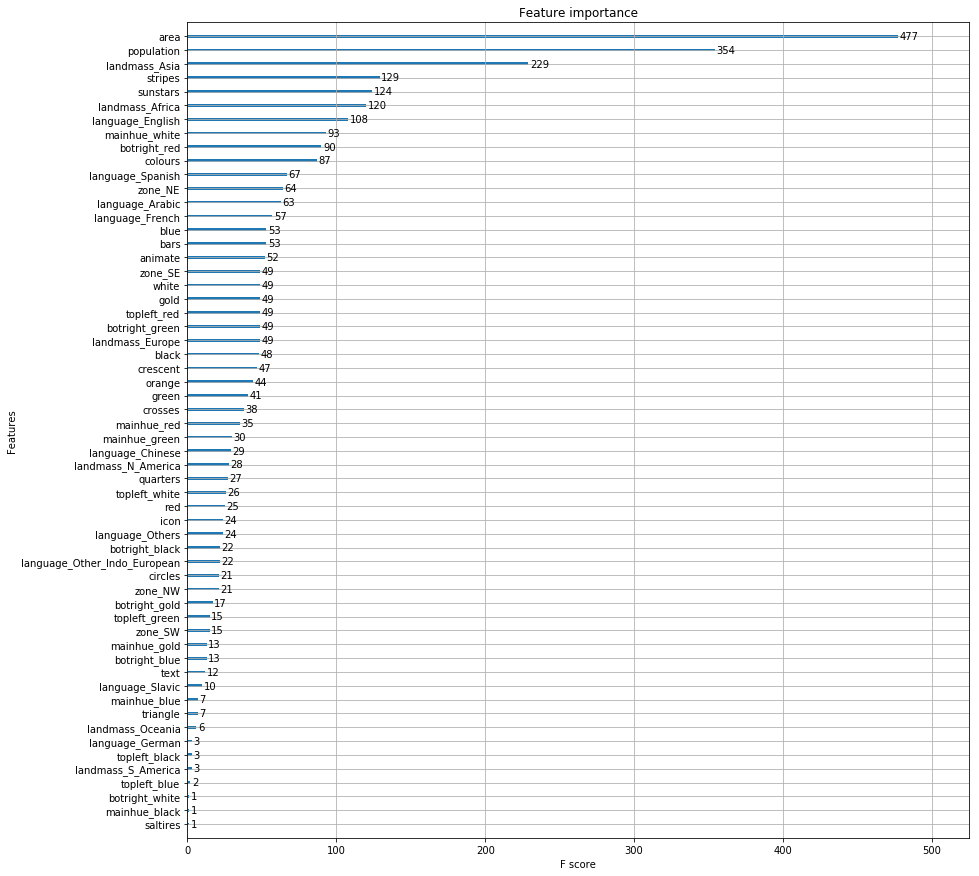

In [207]:
matplotlib.rcParams['figure.figsize'] = (14, 15)
xgboost.plot_importance(booster=clf.best_estimator_)
plt.savefig('lab_2.png')

In [208]:
data2 = data.copy()

In [209]:
# проведеим балансировку классов

# undersampling - на мой взгляд  проводить бессмысленно, так как количество данных очень маленькое

# oversampling - на мой взгляд так как много категориальных переменных, то применим стратегию дублирования семплов 

def balans_class(data, column):
    param_max = data[column].value_counts().max()
    param = data[column].value_counts().to_dict()
    for i in param:
        if(param_max>param[i] ):
            oversaple = data[data[column] == i].sample(n=(param_max-param[i]), replace=True)
            data = pd.concat([data, oversaple],ignore_index=False)
            


In [210]:
balans_class(data2, 'religion')

y2 = data2['religion']
X2 = data2.drop(columns=['religion'])

In [233]:
from sklearn.model_selection import train_test_split

X_train, X_test,y_train, y_test = train_test_split(X2,y2, test_size=0.2)

In [234]:
parameters = {'max_depth': [3, 4, 5]}
xgb2 = xgboost.XGBClassifier(n_jobs=-1)
clf2 = GridSearchCV(xgb2, parameters, cv=3)
clf2.fit(X_train, y_train)
clf2.best_params_

/home/user/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning

{'max_depth': 3}

In [235]:
clf2.best_estimator_.fit(X_train, y_train)
y_predict = clf2.best_estimator_.predict(X_test)

print(classification_report(y_test, y_predict))

             precision    recall  f1-score   support

          0       0.86      1.00      0.92         6
          1       0.82      0.82      0.82        11
          2       0.70      0.78      0.74         9
          3       0.33      1.00      0.50         1
          5       0.86      0.75      0.80         8
          6       1.00      0.50      0.67         2
          7       0.00      0.00      0.00         2

avg / total       0.76      0.77      0.75        39



/home/user/.local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/user/.local/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


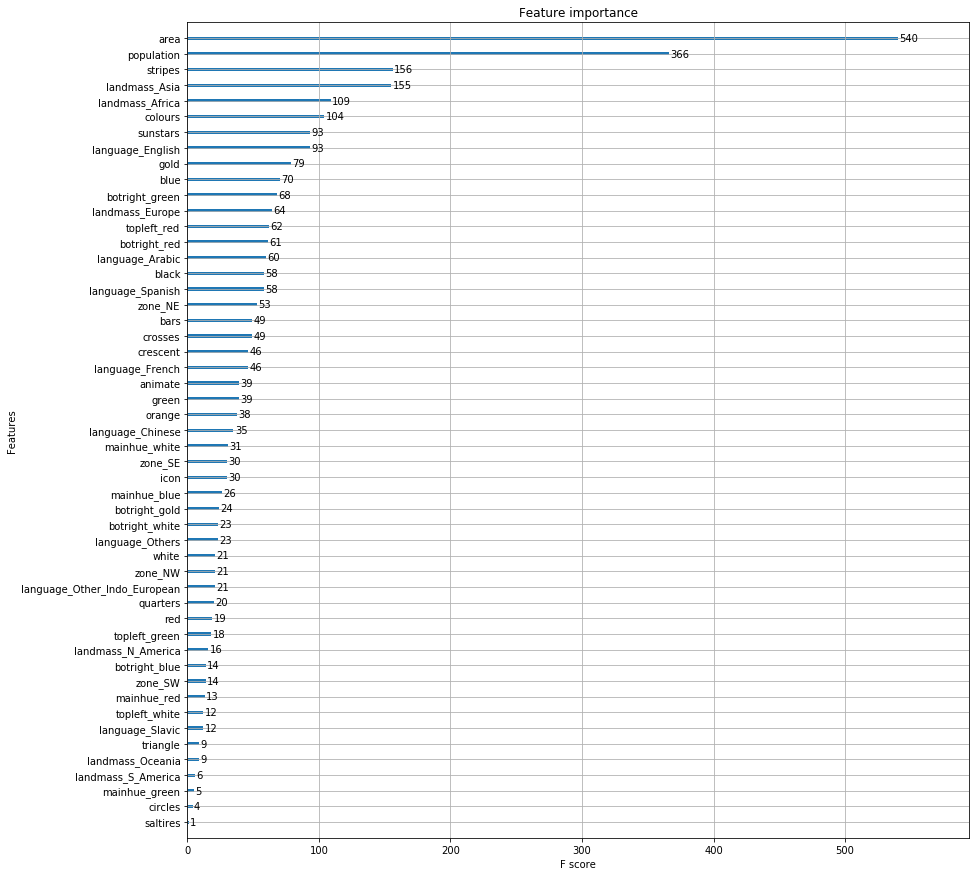

In [236]:
matplotlib.rcParams['figure.figsize'] = (14, 15)
xgboost.plot_importance(booster=clf2.best_estimator_)
plt.savefig('lab_2.png')

In [ ]:
# Проверка показала, что результат сильно зависит от разбиения train_test_split


In [ ]:
# В первом и втором случае основными параметрами на основе которых принимались решения это 
# 'area', 'population', 'stripes'
# т.е. размер страны, количество населения и количество горизонтальных полос на флаге

In [ ]:
# Построим Confusion Matrix для много классовой классификации

In [256]:
y_list = y_test.tolist()
conf_matrix=np.matrix([[0 for i in range(count_religion)] for j in range(count_religion)]) 
for i in range(len(y_list)):
    conf_matrix[y_predict[i],y_list[i]]=conf_matrix[y_list[i],y_predict[i]]+1 

conf_matrix

matrix([[6, 1, 0, 0, 0, 0, 0, 0],
        [0, 9, 1, 0, 0, 2, 0, 0],
        [0, 0, 7, 0, 0, 1, 1, 1],
        [0, 0, 1, 1, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 6, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]])